In [247]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import plotly as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [248]:

df=pd.read_csv('datasets_1489_2704_auto-mpg.csv')
df.columns
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [249]:
df['origin'].replace({1:'American',2:'European',3:'Japanese'},inplace=True)

In [250]:
df.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
car name        398
dtype: int64

In [251]:
df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [252]:
df=df[df.horsepower != '?']

In [253]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null object
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null object
car name        392 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 30.6+ KB


In [255]:
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')

# mpg: continuous
cylinders: multi-valued discrete
displacement: continuous
horsepower: continuous
weight: continuous
acceleration: continuous
model year: multi-valued discrete
origin: multi-valued discrete
car name: string (unique for each instance)

In [256]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

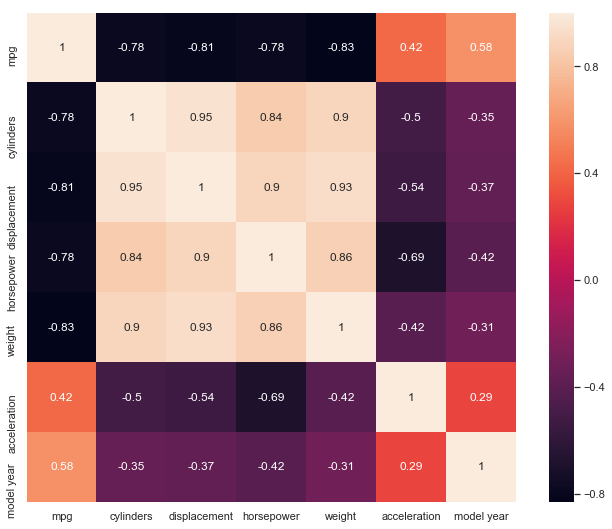

In [257]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True,square=True);

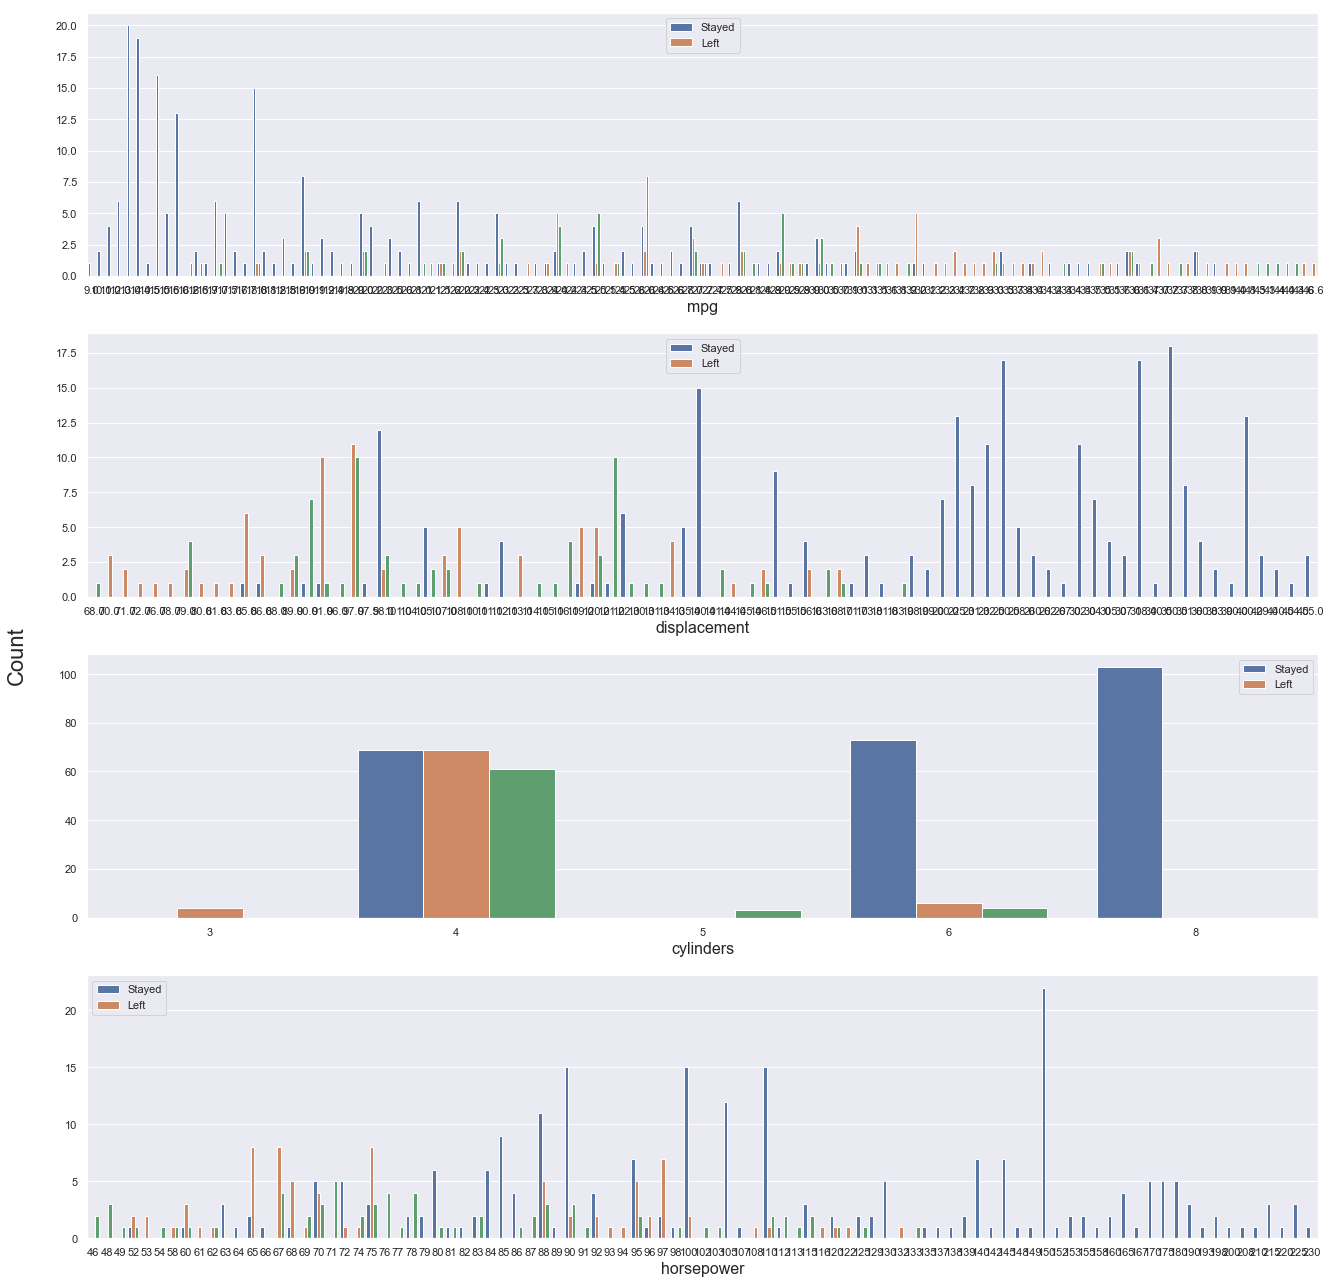

In [258]:
f, axes = plt.subplots(4, 1, figsize=(18,18), tight_layout=True)
x_vars = ['mpg', 'displacement', 'cylinders', 'horsepower','weight','acceleration','model year','car name']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='origin', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)
plt.show()

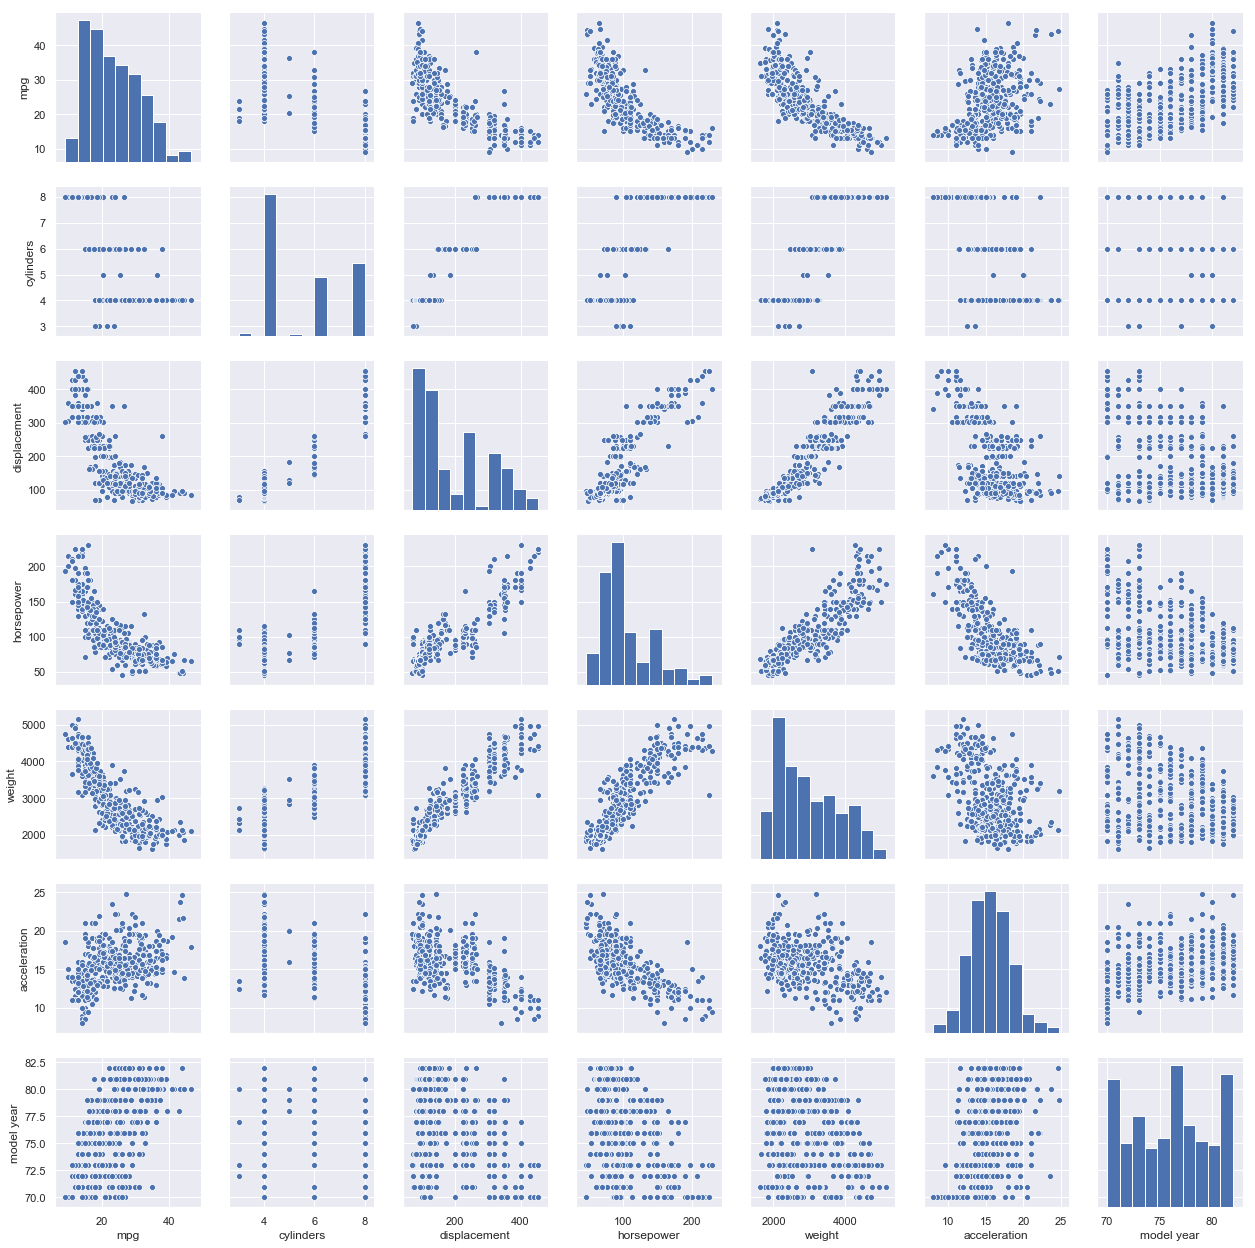

In [259]:
sns.pairplot(df,vars=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year'])

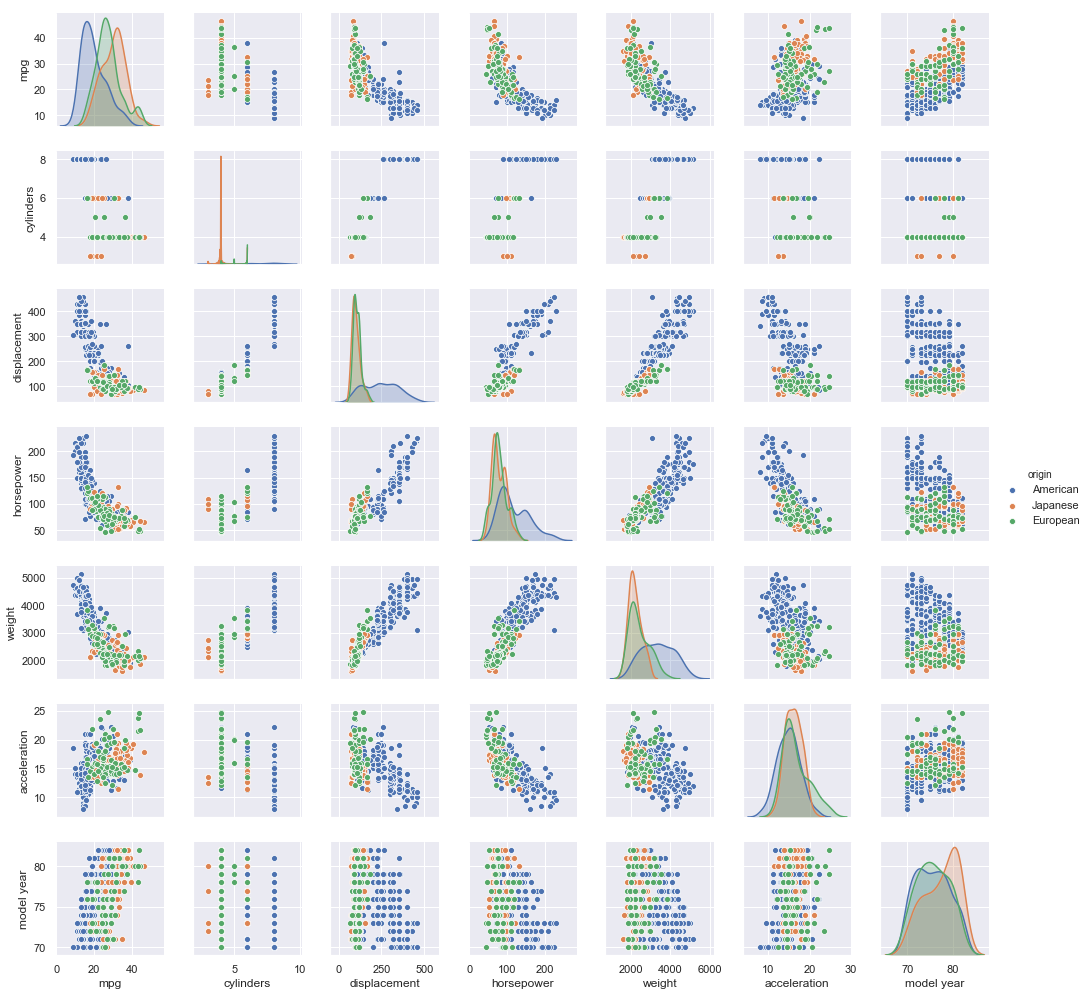

In [260]:
sns.set()
sns.pairplot(df, size = 2.0,hue ='origin')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


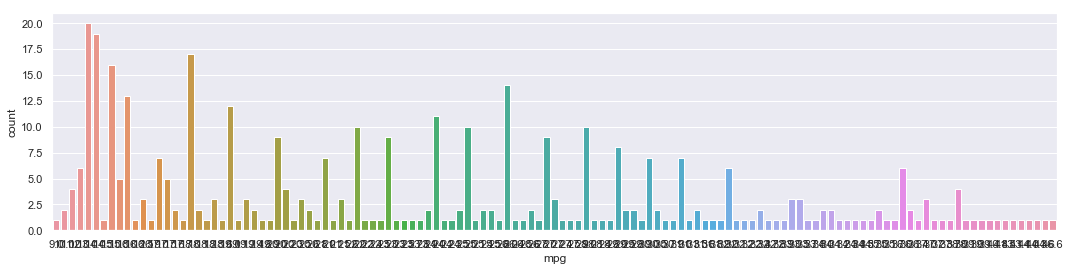

In [261]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df.mpg))


AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: 0.457092
Kurtosis: -0.515993


(None, None, None)

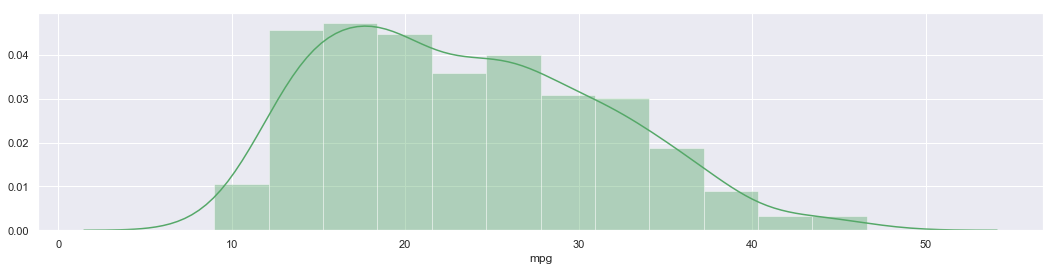

In [262]:
plt.figure(figsize=(18,4))
print(sns.distplot(df['mpg'],color='g')),print("Skewness: %f" % df['mpg'].skew()),print("Kurtosis: %f" % df['mpg'].kurt())

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: 0.508109
Kurtosis: -1.398199


(None, None, None)

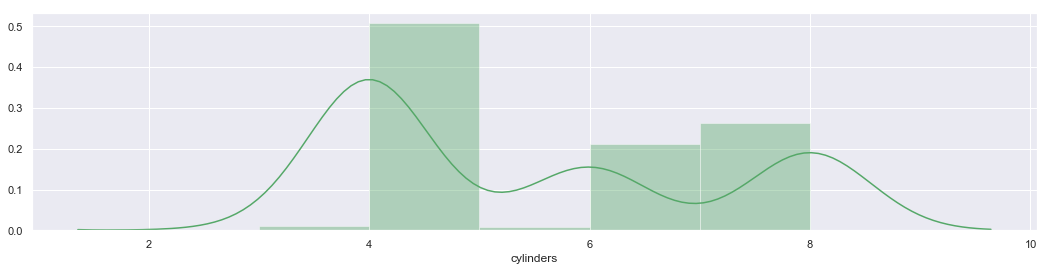

In [263]:
plt.figure(figsize=(18,4))
print(sns.distplot(df['cylinders'],color='g')),print("Skewness: %f" % df['cylinders'].skew()),print("Kurtosis: %f" % df['cylinders'].kurt())

AxesSubplot(0.125,0.125;0.775x0.755)


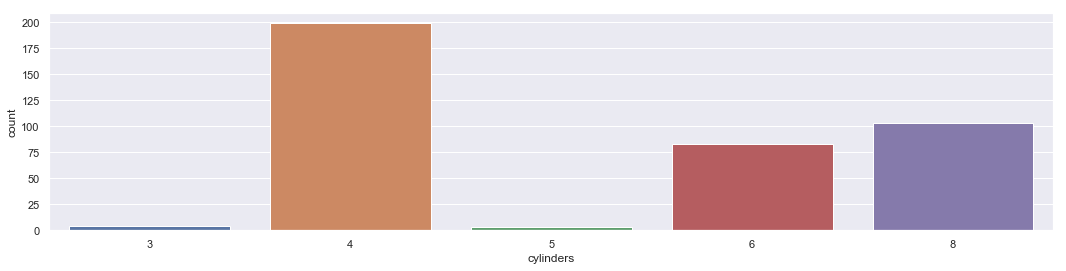

In [264]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df.cylinders))

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: 0.701669
Kurtosis: -0.778317


(None, None, None)

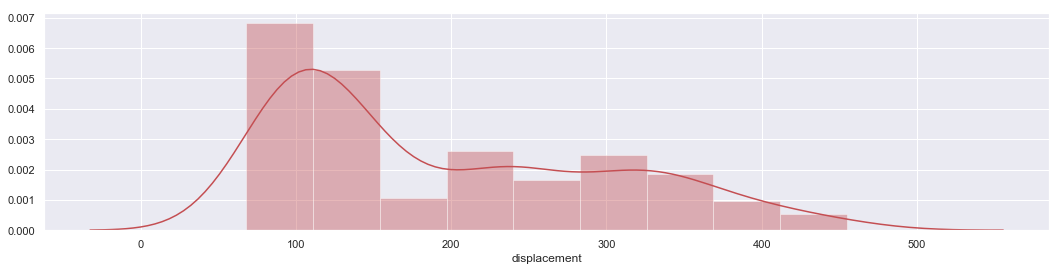

In [265]:

plt.figure(figsize=(18,4))
print(sns.distplot(df['displacement'],color='r')),print("Skewness: %f" % df['displacement'].skew()),print("Kurtosis: %f" % df['displacement'].kurt())


AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: 0.519586
Kurtosis: -0.809259


(None, None, None)

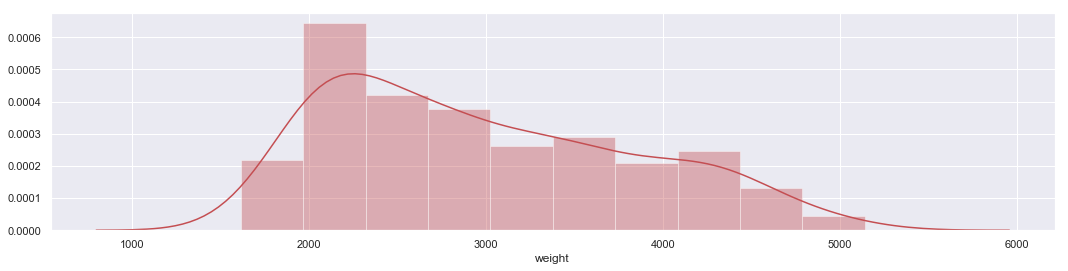

In [266]:
plt.figure(figsize=(18,4))
print(sns.distplot(df['weight'],color='r')),print("Skewness: %f" % df['weight'].skew()),print("Kurtosis: %f" % df['weight'].kurt())

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: 0.291587
Kurtosis: 0.444234


(None, None, None)

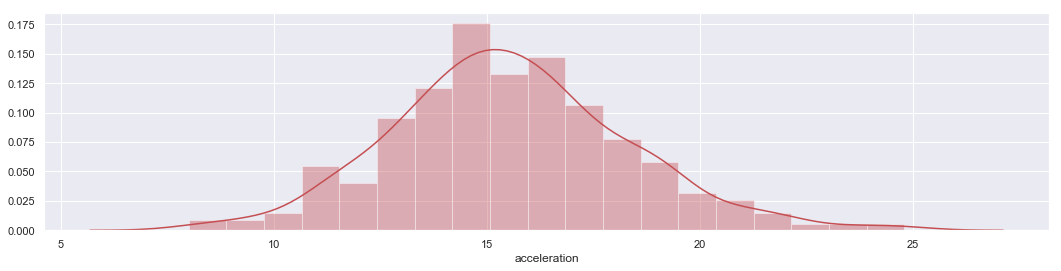

In [267]:
plt.figure(figsize=(18,4))
print(sns.distplot(df['acceleration'],color='r')),print("Skewness: %f" % df['acceleration'].skew()),print("Kurtosis: %f" % df['acceleration'].kurt())

In [268]:
df['origin'].replace({1:'American',2:'European',3:'Japanese'},inplace=True)

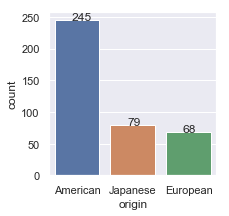

In [269]:
plt.figure(figsize=(3,3))
ax=sns.countplot(df['origin'])
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()))

origin
American    15.0
European    15.6
Japanese    16.4
Name: acceleration, dtype: float64


Text(0, 0.5, 'Avg Acceleration')

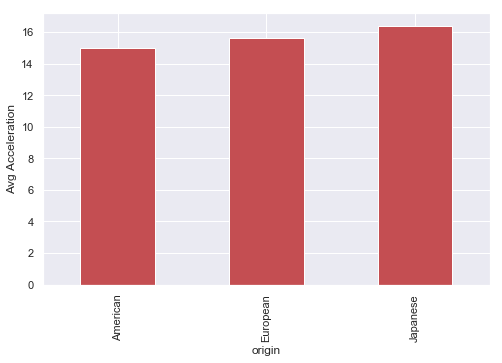

In [270]:
plt.figure(figsize=(8,5))
acc=(df.groupby('origin')['acceleration'].median())
print(acc)
acc.plot(kind='bar',color='r')
plt.ylabel('Avg Acceleration')

origin
American    105.0
European     76.5
Japanese     75.0
Name: horsepower, dtype: float64


Text(0, 0.5, 'Avg. HP')

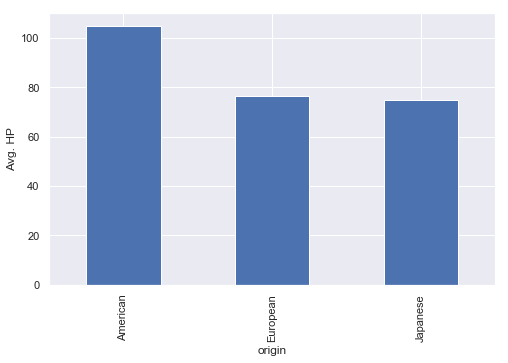

In [271]:
plt.figure(figsize=(8,5))
hp=(df.groupby('origin')['horsepower'].median())
print(hp)
hp.plot(kind='bar')
plt.ylabel('Avg. HP')

origin
American    18.5
European    26.0
Japanese    31.6
Name: mpg, dtype: float64


Text(0, 0.5, 'Avg Mpg')

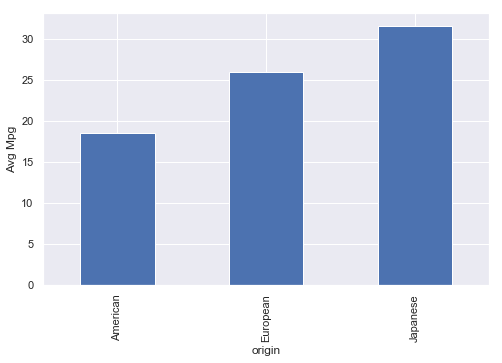

In [272]:
plt.figure(figsize=(8,5))
mpg=(df.groupby('origin')['mpg'].median())
print(mpg)
mpg.plot(kind='bar')
plt.ylabel('Avg Mpg')

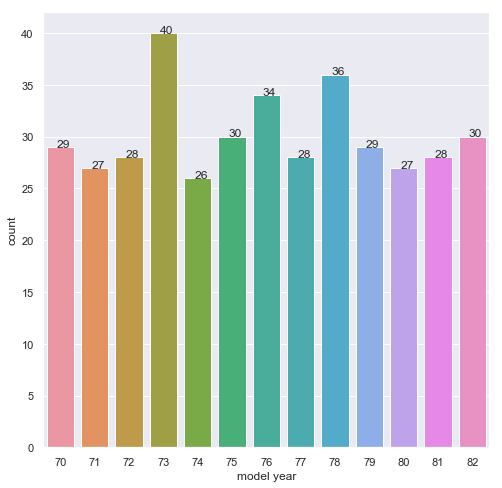

In [273]:
plt.figure(figsize=(8,8))
ax=sns.countplot(df['model year'])
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()))

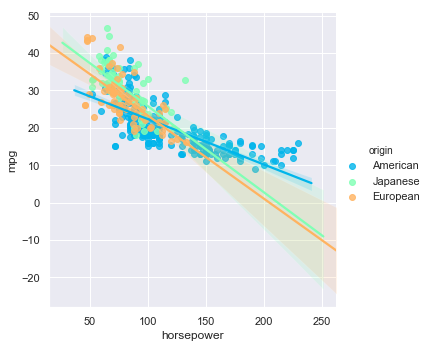

In [274]:
plot = sns.lmplot('horsepower','mpg',data=df,hue='origin',palette = "rainbow")
plt.show()

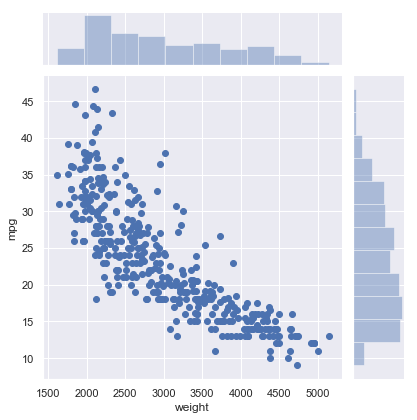

In [275]:
sns.jointplot(x=df['weight'],y=df['mpg'])


<Figure size 1296x720 with 0 Axes>

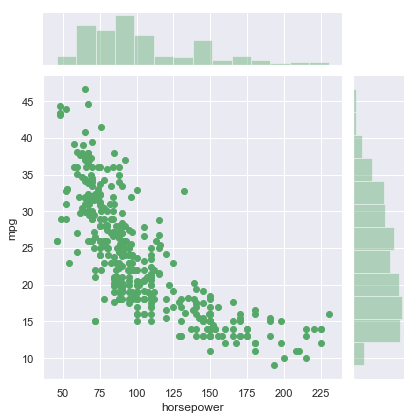

In [276]:
plt.figure(figsize=(18,10))
sns.jointplot(x=df['horsepower'],y=df['mpg'],color='g')

<Figure size 576x576 with 0 Axes>

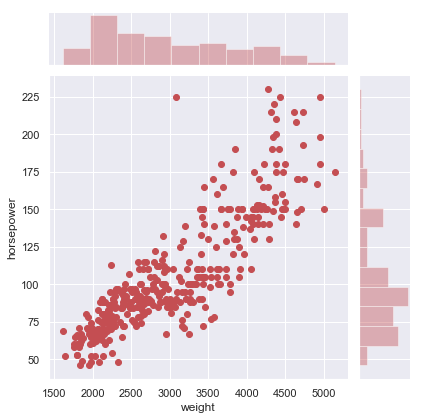

In [277]:
plt.figure(figsize=(8,8))
c=sns.jointplot(x=df['weight'],y=df['horsepower'],color='r')

In [278]:
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')

In [279]:
df_copy=df.copy()

In [280]:
df_copy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,American,ford torino


In [302]:
x = df.iloc[:,1:8].values
y = df.iloc[:,0].values

In [303]:
ct = ColumnTransformer([("encoder",OneHotEncoder(categories = "auto"),[6])], remainder = "passthrough")
x = np.array(ct.fit_transform(x))

In [304]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,random_state = 0) 


In [305]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_scaled = sc_x.fit_transform(X_train)
x_test_scaled = sc_x.transform(X_test)
y_train_scaled = sc_y.fit(Y_train.reshape(-1,1))
y_train_scaled = sc_y.transform(Y_train.reshape(-1,1))
y_test_scaled = sc_y.transform(Y_test.reshape(-1,1))

In [306]:
linreg = LinearRegression()
linreg.fit(x_train_scaled,y_train_scaled)
y_pred = sc_y.inverse_transform(linreg.predict(x_test_scaled))

In [228]:
r2_score(Y_test,y_pred)

0.8237889838877059

In [308]:
y_pred = linreg.predict(X_test)
print(linreg.score(x_test_scaled,y_test_scaled))

0.820842278957376


# Decision Tree Regressor

In [310]:
tree = DecisionTreeRegressor()
tree.fit(X_train,Y_train)
y_pred = tree.predict(X_test)


In [311]:
importance = tree.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00011
Feature: 1, Score: 0.00103
Feature: 2, Score: 0.00443
Feature: 3, Score: 0.00111
Feature: 4, Score: 0.64051
Feature: 5, Score: 0.13300
Feature: 6, Score: 0.06265
Feature: 7, Score: 0.02721
Feature: 8, Score: 0.12995


In [312]:
r2_score(Y_test,y_pred)

0.8183219954069736

In [314]:
y_pred = tree.predict(X_test)
print(tree.score(Y_test,y_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[26.6 31.8 26.  24.  18.  25.  13.  31.9 28.4 18.2 13.  18.  30.  37.7
 31.  32.2 34.  13.  32.8 15.  34.2 20.  30.5 15.  19.2 34.4 18.  26.
 24.5 20.5 25.  20.2 14.  28.  20.6 25.8 32.4 16.  27.  10.  29.  18.
 13.  28.  23.  17.6 14.  16.  15.  30.5 12.  24.  44.6 24.5 12.  19.
 23.  27.2 21.  27.  14.  38.  29.8 33.  25.  29.8 14.  22.  18.  20.2
 14.  28.  41.5 18.1 32.9 15.  25.5 13.  30.9 32.  23.  15.5 35.  18.
 39.1 27.4 17.  13.  15.  32.  16.  15.  11.  17.  18.  28.  34.1 33. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.